In [2]:
import pandas as pd
import statsmodels.api as sm

# Load your data
child_mortality_df = pd.read_csv('../data_wrangling/datasets_from_1985_total/1985_child_mortality_selected.csv')
population_df = pd.read_csv('../data_wrangling/datasets_from_1985_total/1985_population_selected.csv')

# Merge data on 'year'
merged_df = pd.merge(
    child_mortality_df[['year', 'global_mortality_rate']],
    population_df[['year', 'population_total']],
    on='year'
)

# Calculate year-over-year population growth rate (as a %)
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100

# Drop first row (NaN from pct_change)
merged_df = merged_df.dropna()

# Set up OLS regression: population growth ~ global mortality rate
X = merged_df[['global_mortality_rate']]
X = sm.add_constant(X)  # adds intercept
y = merged_df['population_growth_rate']

# Fit the model
model = sm.OLS(y, X).fit()

# Extract results
p_value = model.pvalues['global_mortality_rate']
r_squared = model.rsquared
coefficient = model.params['global_mortality_rate']

# Print the results
print(f"Coefficient (mortality): {coefficient:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"R-squared: {r_squared:.4f}")

#The coefficient is positive and statistically significant: This suggests that higher child mortality is associated with higher population growth, which is counterintuitive — likely reflecting some confounding global trend (e.g. both declining over time).
#The p-value is very small → we reject the null hypothesis:


Coefficient (mortality): 0.016186
P-value: 0.000000
R-squared: 0.9405


In [3]:
# Load your data
gdp_df = pd.read_csv('../data_wrangling/datasets_from_1985_total/1985_gdp_selected.csv')

# Merge GDP per capita and population data on 'year'
merged_df = pd.merge(
    gdp_df[['year', 'gdp_per_person']],
    population_df[['year', 'population_total']],
    on='year'
)

# Calculate year-over-year population growth rate (as a %)
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100

# Drop the first row (NaN from pct_change)
merged_df = merged_df.dropna()

# Run OLS regression: population growth ~ gdp_per_person
X = merged_df[['gdp_per_person']]
X = sm.add_constant(X)  # Adds intercept
y = merged_df['population_growth_rate']

# Fit model
model = sm.OLS(y, X).fit()

# Extract values
coefficient = model.params['gdp_per_person']
p_value = model.pvalues['gdp_per_person']
r_squared = model.rsquared

# Print nicely formatted results
print(f"📉 Coefficient (GDP per capita): {coefficient:.6f}")
print(f"📊 R-squared: {r_squared:.4f}")
print(f"🧪 P-value: {p_value:.24f}")


#Negative coefficient means: higher GDP per capita is associated with lower population growth.
#Very small p-value → strong statistical evidence against the null hypothesis.
#R² = 0.89 → GDP per capita explains ~89% of the variation in population growth.

📉 Coefficient (GDP per capita): -0.000103
📊 R-squared: 0.8889
🧪 P-value: 0.000000000000000000931559


In [4]:
# Load your data
education_df = pd.read_csv('../data_wrangling/datasets_from_1985_total/1985_education_rate_selected.csv')

# Merge education and population data on 'year'
merged_df = pd.merge(
    education_df[['year', 'global_education']],
    population_df[['year', 'population_total']],
    on='year'
)

# Calculate year-over-year population growth rate (as a %)
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100

# Drop the first row (NaN from pct_change)
merged_df = merged_df.dropna()

# Run OLS regression: population growth ~ global_education
X = merged_df[['global_education']]
X = sm.add_constant(X)  # Adds intercept
y = merged_df['population_growth_rate']

model = sm.OLS(y, X).fit()

# Extract and print results
coefficient = model.params['global_education']
p_value = model.pvalues['global_education']
r_squared = model.rsquared

print(f"📉 Coefficient (global_education): {coefficient:.6f}")
print(f"📊 R-squared: {r_squared:.4f}")
print(f"🧪 P-value: {p_value:.30f}")

#The negative coefficient suggests that higher female education rates are strongly associated with lower population growth.

#The R-squared is very high (96%), meaning the model explains most of the variation in population growth.

#The extremely small p-value means this relationship is statistically significant — you can confidently reject the null hypothesis of no relationship.




📉 Coefficient (global_education): -0.037770
📊 R-squared: 0.9626
🧪 P-value: 0.000000000000000000000000002819


In [5]:
# Load the data
fertility_df = pd.read_csv('../data_wrangling/datasets_from_1985_total/1985_fertility_rate_selected.csv')

# Merge on 'year'
merged_df = pd.merge(
    fertility_df[['year', 'global_fertility_rate']],
    child_mortality_df[['year', 'global_mortality_rate']],
    on='year'
)

# Set up OLS regression: child mortality ~ fertility rate
X = merged_df[['global_fertility_rate']]
X = sm.add_constant(X)  # adds intercept
y = merged_df['global_mortality_rate']

# Fit the model
model = sm.OLS(y, X).fit()

# Extract and print results
coefficient = model.params['global_fertility_rate']
p_value = model.pvalues['global_fertility_rate']
r_squared = model.rsquared

print(f"📉 Coefficient (global_fertility_rate): {coefficient:.4f}")
print(f"📊 R-squared: {r_squared:.4f}")
print(f"🧪 P-value: {p_value:.30f}")


📉 Coefficient (global_fertility_rate): 45.3974
📊 R-squared: 0.9277
🧪 P-value: 0.000000000000000000000104885339


In [6]:
# Merge on 'year'
merged_df = pd.merge(
    fertility_df[['year', 'global_fertility_rate']],
    child_mortality_df[['year', 'global_mortality_rate']],
    on='year'
)

# Run regression for lags from 1 to 10 years
results = []

for lag in range(1, 11):
    df_lagged = merged_df.copy()
    df_lagged['lagged_mortality'] = df_lagged['global_mortality_rate'].shift(lag)
    df_lagged = df_lagged.dropna(subset=['lagged_mortality'])

    X = df_lagged[['lagged_mortality']]
    X = sm.add_constant(X)
    y = df_lagged['global_fertility_rate']

    model = sm.OLS(y, X).fit()

    results.append({
        'Lag (Years)': lag,
        'Coefficient': model.params['lagged_mortality'],
        'R-squared': model.rsquared,
        'P-value': model.pvalues['lagged_mortality']
    })

# Create and display results DataFrame
results_df = pd.DataFrame(results)
display(results_df.round(6))


,Lag (Years),Coefficient,R-squared,P-value
0,1,0.019695,0.920569,0.0
1,2,0.018855,0.917144,0.0
2,3,0.017927,0.919680,0.0
3,4,0.017107,0.922282,0.0
4,5,0.016244,0.932277,0.0
5,6,0.015315,0.955711,0.0
6,7,0.014854,0.961073,0.0
7,8,0.014541,0.964165,0.0
8,9,0.014328,0.966550,0.0
9,10,0.014194,0.968565,0.0


In [7]:
# Merge on 'year'
merged_df = pd.merge(
    education_df[['year', 'global_education']],
    fertility_df[['year', 'global_fertility_rate']],
    on='year'
)

# Set up the regression: fertility ~ education
X = merged_df[['global_education']]
X = sm.add_constant(X)
y = merged_df['global_fertility_rate']

# Fit the model
model = sm.OLS(y, X).fit()

# Extract and print results
coefficient = model.params['global_education']
p_value = model.pvalues['global_education']
r_squared = model.rsquared

print(f"📉 Coefficient (global_education): {coefficient:.6f}")
print(f"📊 R-squared: {r_squared:.4f}")
print(f"🧪 P-value: {p_value:.30f}")


📉 Coefficient (global_education): -0.047401
📊 R-squared: 0.9412
🧪 P-value: 0.000000000000000000000002327364


In [8]:


# Merge on 'year'
merged_df = pd.merge(
    fertility_df[['year', 'global_fertility_rate']],
    education_df[['year', 'global_education']],
    on='year'
)

# Test lags from 1 to 10 years
results = []

for lag in range(1, 11):
    df_lagged = merged_df.copy()
    df_lagged['lagged_education'] = df_lagged['global_education'].shift(lag)
    df_lagged = df_lagged.dropna(subset=['lagged_education'])

    X = df_lagged[['lagged_education']]
    X = sm.add_constant(X)
    y = df_lagged['global_fertility_rate']

    model = sm.OLS(y, X).fit()

    results.append({
        'Lag (Years)': lag,
        'Coefficient': model.params['lagged_education'],
        'R-squared': model.rsquared,
        'P-value': model.pvalues['lagged_education']
    })

# Create and display the results DataFrame
results_df = pd.DataFrame(results).round(6)
display(results_df)


,Lag (Years),Coefficient,R-squared,P-value
0,1,-0.046311,0.936137,0.0
1,2,-0.044827,0.934545,0.0
2,3,-0.043031,0.937075,0.0
3,4,-0.041455,0.940089,0.0
4,5,-0.039413,0.948680,0.0
5,6,-0.037126,0.968210,0.0
6,7,-0.035955,0.970105,0.0
7,8,-0.035482,0.969942,0.0
8,9,-0.034864,0.970077,0.0
9,10,-0.034481,0.969832,0.0


In [9]:

# Merge on 'year'
merged_df = pd.merge(
    gdp_df[['year', 'gdp_per_person']],
    fertility_df[['year', 'global_fertility_rate']],
    on='year'
)

# Set up OLS regression: fertility rate ~ GDP per capita
X = merged_df[['gdp_per_person']]
X = sm.add_constant(X)
y = merged_df['global_fertility_rate']

# Fit the model
model = sm.OLS(y, X).fit()

# Extract and print results
coefficient = model.params['gdp_per_person']
p_value = model.pvalues['gdp_per_person']
r_squared = model.rsquared

print(f"📉 Coefficient (gdp_per_person): {coefficient:.6f}")
print(f"📊 R-squared: {r_squared:.4f}")
print(f"🧪 P-value: {p_value:.30f}")


📉 Coefficient (gdp_per_person): -0.000128
📊 R-squared: 0.8329
🧪 P-value: 0.000000000000000600025037566032


In [10]:

# Merge on 'year'
merged_df = pd.merge(
    gdp_df[['year', 'gdp_per_person']],
    fertility_df[['year', 'global_fertility_rate']],
    on='year'
)

# Prepare results list
results = []

# Run regressions for lags from 1 to 10
for lag in range(1, 11):
    df_lagged = merged_df.copy()
    df_lagged['lagged_gdp'] = df_lagged['gdp_per_person'].shift(lag)
    df_lagged = df_lagged.dropna(subset=['lagged_gdp'])

    X = df_lagged[['lagged_gdp']]
    X = sm.add_constant(X)
    y = df_lagged['global_fertility_rate']

    model = sm.OLS(y, X).fit()

    results.append({
        'Lag (Years)': lag,
        'Coefficient': model.params['lagged_gdp'],
        'R-squared': model.rsquared,
        'P-value': model.pvalues['lagged_gdp']
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results).round(6)
display(results_df)


,Lag (Years),Coefficient,R-squared,P-value
0,1,-0.000128,0.832301,0.0
1,2,-0.000127,0.839431,0.0
2,3,-0.000125,0.854020,0.0
3,4,-0.000121,0.862340,0.0
4,5,-0.000117,0.880218,0.0
5,6,-0.000114,0.917627,0.0
6,7,-0.000113,0.938996,0.0
7,8,-0.000112,0.952425,0.0
8,9,-0.000112,0.957886,0.0
9,10,-0.000114,0.961326,0.0


In [11]:

# Merge on 'year'
merged_df = pd.merge(
    fertility_df[['year', 'global_fertility_rate']],
    population_df[['year', 'population_total']],
    on='year'
)

# Calculate year-over-year population growth rate (as a %)
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100

# Drop first row (NaN from pct_change)
merged_df = merged_df.dropna()

# Run OLS regression: population growth ~ fertility rate
X = merged_df[['global_fertility_rate']]
X = sm.add_constant(X)
y = merged_df['population_growth_rate']

model = sm.OLS(y, X).fit()

# Extract and print results
coefficient = model.params['global_fertility_rate']
p_value = model.pvalues['global_fertility_rate']
r_squared = model.rsquared

print(f"📉 Coefficient (global_fertility_rate): {coefficient:.6f}")
print(f"📊 R-squared: {r_squared:.4f}")
print(f"🧪 P-value: {p_value:.30f}")


📉 Coefficient (global_fertility_rate): 0.780469
📊 R-squared: 0.9467
🧪 P-value: 0.000000000000000000000001636204


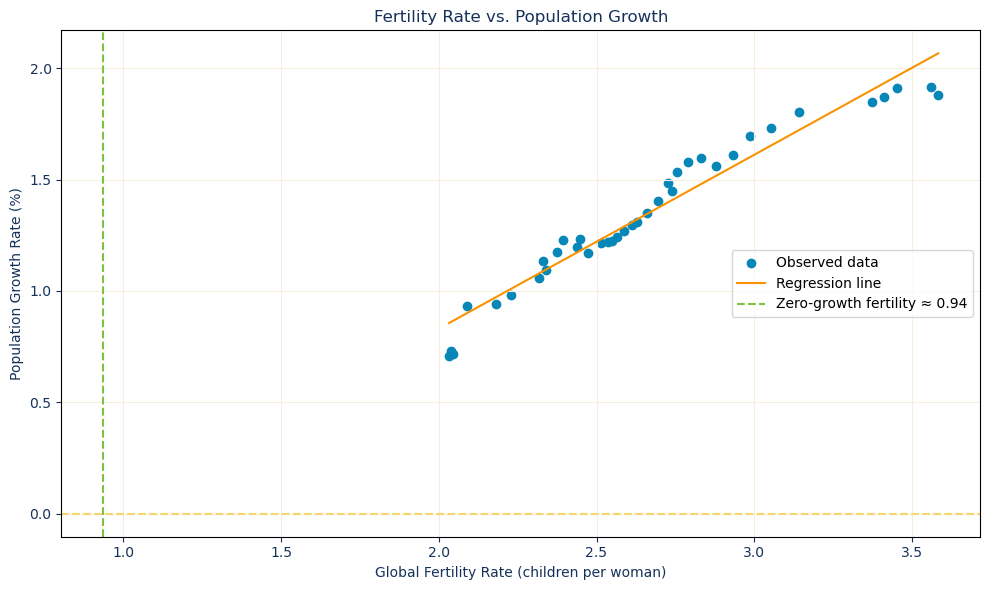

📉 Coefficient (fertility rate): 0.780469
📊 R-squared: 0.9467
🧪 P-value: 0.000000000000000000000001636204


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the datasets
fertility_df = pd.read_csv('../data_wrangling/datasets_from_1985_total/1985_fertility_rate_selected.csv')
population_df = pd.read_csv('../data_wrangling/datasets_from_1985_total/1985_population_selected.csv')

# Merge the two datasets on 'year'
merged_df = pd.merge(
    fertility_df[['year', 'global_fertility_rate']],
    population_df[['year', 'population_total']],
    on='year'
)

# Calculate year-over-year population growth rate (%)
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100
merged_df = merged_df.dropna()

# Set up linear regression
X = merged_df[['global_fertility_rate']]
X = sm.add_constant(X)
y = merged_df['population_growth_rate']
model = sm.OLS(y, X).fit()

# Extract model parameters
intercept = model.params['const']
slope = model.params['global_fertility_rate']
fertility_zero_growth = -intercept / slope
coefficient = slope
p_value = model.pvalues['global_fertility_rate']
r_squared = model.rsquared

# Prepare regression line
fertility_range = pd.Series(sorted(merged_df['global_fertility_rate']))
predicted_growth = intercept + slope * fertility_range

# Define color palette
color_palette = {
    'background': '#ffffff',
    'grid': '#f7eddf',
    'observed': '#0787b8',
    'regression': '#f99200',
    'zero_line': '#f5d66b',
    'zero_point': '#7cc140',
    'text': '#163159'
}

# Plot setup
plt.figure(figsize=(10, 6), facecolor=color_palette['background'])
plt.scatter(merged_df['global_fertility_rate'], merged_df['population_growth_rate'],
            color=color_palette['observed'], label='Observed data')
plt.plot(fertility_range, predicted_growth, color=color_palette['regression'], label='Regression line')
plt.axhline(0, color=color_palette['zero_line'], linestyle='--')
plt.axvline(fertility_zero_growth, color=color_palette['zero_point'], linestyle='--',
            label=f'Zero-growth fertility ≈ {fertility_zero_growth:.2f}')
plt.title('Fertility Rate vs. Population Growth', color=color_palette['text'])
plt.xlabel('Global Fertility Rate (children per woman)', color=color_palette['text'])
plt.ylabel('Population Growth Rate (%)', color=color_palette['text'])
plt.tick_params(colors=color_palette['text'])
plt.grid(True, color=color_palette['grid'])
plt.legend()
plt.tight_layout()
plt.show()

# Output regression metrics
print(f"📉 Coefficient (fertility rate): {coefficient:.6f}")
print(f"📊 R-squared: {r_squared:.4f}")
print(f"🧪 P-value: {p_value:.30f}")


ANOVA Test Result:
F-statistic: 195.14
P-value: 0.00000000000000000000000000000000000000000000000000


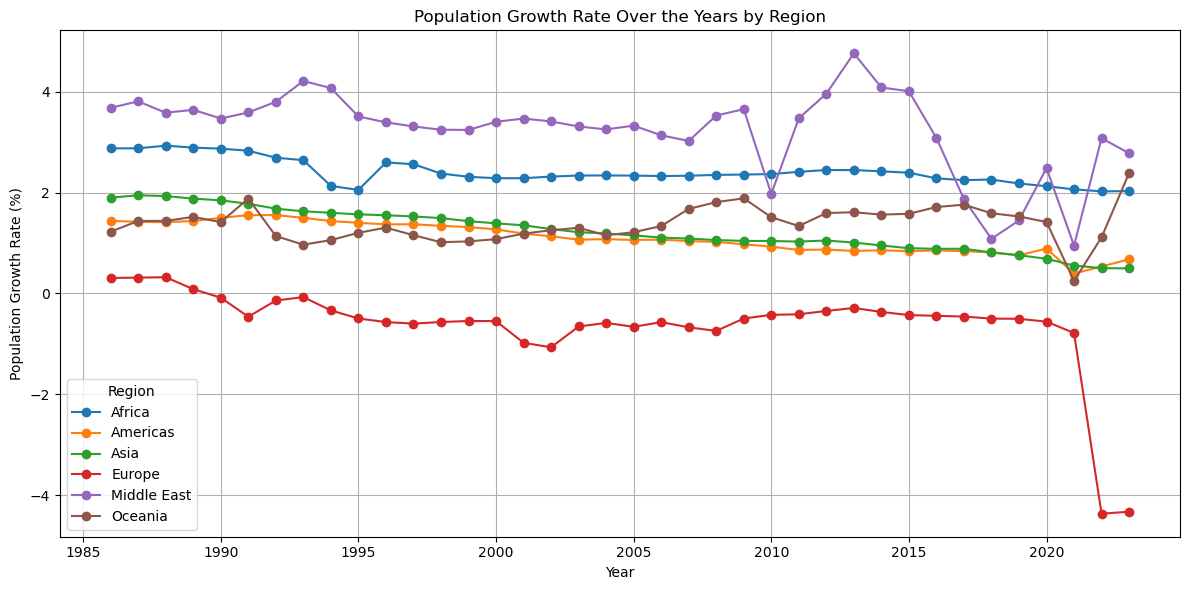

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load your dataset
population_df_melt = pd.read_csv('../final_to_sql/additional_tables_melt/melted_1985_population.csv')

# Assign regions (simplified manual mapping — expand as needed)
region_map = {
    # Africa
    "Uganda": "Africa", "Nigeria": "Africa", "Rwanda": "Africa", "Senegal": "Africa", "Ethiopia": "Africa",
    "Algeria": "Africa", "Egypt": "Africa", "South Africa": "Africa", "Morocco": "Africa", "Ghana": "Africa",

    # Asia
    "India": "Asia", "China": "Asia", "Nepal": "Asia", "Bangladesh": "Asia", "Pakistan": "Asia", 
    "Japan": "Asia", "Singapore": "Asia", "Malaysia": "Asia", "Thailand": "Asia", "Philippines": "Asia",

    # Americas
    "Brazil": "Americas", "Argentina": "Americas", "Colombia": "Americas", "Chile": "Americas", 
    "Guatemala": "Americas", "Haiti": "Americas", "Canada": "Americas", "United States": "Americas",
    "Panama": "Americas", "Paraguay": "Americas",

    # Europe
    "Germany": "Europe", "France": "Europe", "Italy": "Europe", "Spain": "Europe", "United Kingdom": "Europe",
    "Romania": "Europe", "Serbia": "Europe", "Ukraine": "Europe", "Hungary": "Europe", "Bulgaria": "Europe",

    # Oceania
    "Australia": "Oceania", "New Zealand": "Oceania", "Fiji": "Oceania", "Samoa": "Oceania", 
    "Tonga": "Oceania", "Solomon Islands": "Oceania", "Nauru": "Oceania", "Kiribati": "Oceania",

    # Middle East
    "Israel": "Middle East", "Jordan": "Middle East", "Iraq": "Middle East", "Yemen": "Middle East", 
    "Saudi Arabia": "Middle East", "Qatar": "Middle East", "Bahrain": "Middle East", "Lebanon": "Middle East",
    "Oman": "Middle East", "United Arab Emirates": "Middle East"
}

# Assign region to each country
population_df_melt['region'] = population_df_melt['country'].map(region_map)
population_df_melt = population_df_melt.dropna(subset=['region'])

# Group by region and year, then sum population
region_year_df = (
    population_df_melt.groupby(['region', 'year'])['population']
    .sum()
    .reset_index()
)

# Calculate year-over-year population growth rate by region
region_year_df['population_growth_rate'] = (
    region_year_df.groupby('region')['population']
    .pct_change() * 100
)
region_year_df = region_year_df.dropna()

# Prepare data for ANOVA: list of growth rates per region
grouped_growth = [
    group['population_growth_rate'].values
    for _, group in region_year_df.groupby('region')
]

# Run one-way ANOVA test
anova_result = f_oneway(*grouped_growth)

# Output test results
print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.50f}")

# Plot population growth rate trends by region
plt.figure(figsize=(12, 6))

for region, group in region_year_df.groupby('region'):
    plt.plot(group['year'], group['population_growth_rate'], marker='o', label=region)

plt.title("Population Growth Rate Over the Years by Region")
plt.xlabel("Year")
plt.ylabel("Population Growth Rate (%)")
plt.legend(title="Region")
plt.grid(True)
plt.tight_layout()
plt.show()
